In [285]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [286]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [287]:
df2_ = pd.read_csv('./csv/gp_ts/gp_ts_2.csv')
df2_.head()

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
0,0.3,0.6,0.05,0.05,0.05,163,1
1,0.3,0.6,0.05,0.05,0.10,182,1
2,0.3,0.6,0.05,0.05,0.15,169,1
3,0.3,0.6,0.05,0.05,0.20,153,1
4,0.3,0.6,0.05,0.05,0.25,180,1


In [288]:
f_max = 0.6
f_sigma = 0.3
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]

n_play = 300
t_t_r = f_max * n_play

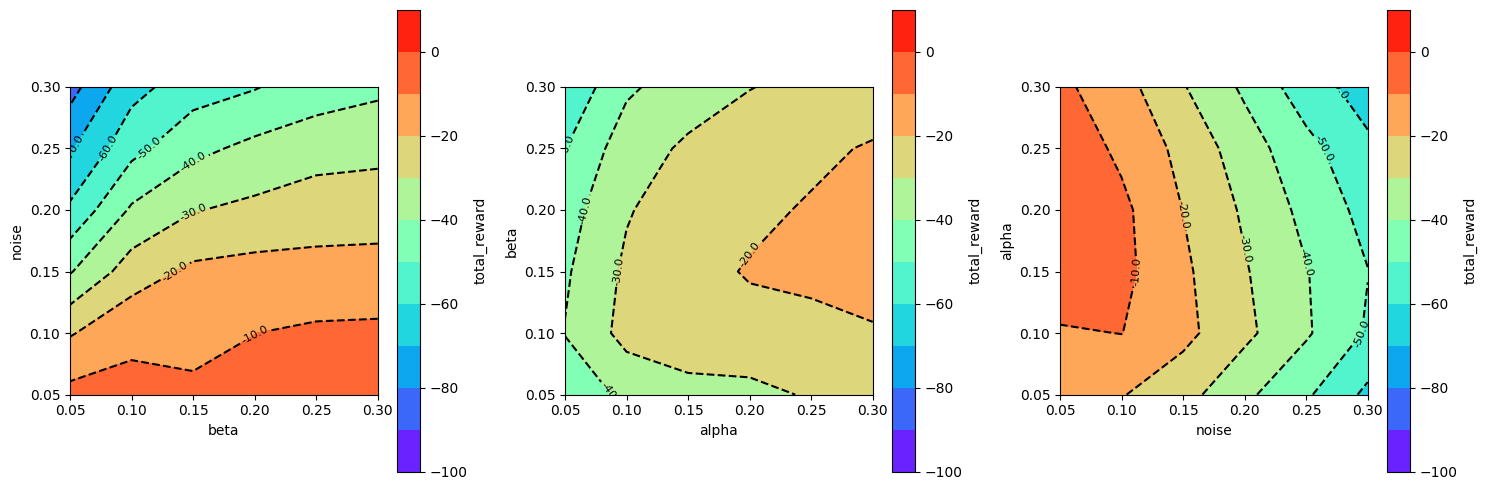

In [289]:
import matplotlib.pyplot as plt
import numpy as np
lev = [i for i in range(-100, 15, 10)]

# Noise-Beta Plot
df_subset1 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset1 = df_subset1.groupby(['noise', 'beta'])['total_reward'].mean().reset_index()

pivot_table1 = df_subset1.pivot(index='noise', columns='beta', values='total_reward')
pivot_table1 = pivot_table1.fillna(0)

X1 = pivot_table1.columns.values
Y1 = pivot_table1.index.values
Z1 = pivot_table1.values - t_t_r
X1, Y1 = np.meshgrid(X1, Y1)

# Alpha-Beta Plot
df_subset2 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset2 = df_subset2.groupby(['alpha', 'beta'])['total_reward'].mean().reset_index()

pivot_table2 = df_subset2.pivot(index='alpha', columns='beta', values='total_reward')
pivot_table2 = pivot_table2.fillna(0)

X2 = pivot_table2.columns.values
Y2 = pivot_table2.index.values
Z2 = pivot_table2.values - t_t_r
X2, Y2 = np.meshgrid(X2, Y2)

# Alpha-Noise Plot
df_subset3 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset3 = df_subset3.groupby(['alpha', 'noise'])['total_reward'].mean().reset_index()

pivot_table3 = df_subset3.pivot(index='alpha', columns='noise', values='total_reward')
pivot_table3 = pivot_table3.fillna(0)

X3 = pivot_table3.columns.values
Y3 = pivot_table3.index.values
Z3 = pivot_table3.values - t_t_r
X3, Y3 = np.meshgrid(X3, Y3)

# Create a figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Noise-Beta
c1 = axs[0].contour(X1, Y1, Z1,colors='black', levels=lev)
c1.clabel(fmt='%1.1f', fontsize=8) 
c1 = axs[0].contourf(X1, Y1, Z1,cmap='rainbow', levels=lev)  

fig.colorbar(c1, ax=axs[0], label='total_reward')
axs[0].set_ylabel('noise')
axs[0].set_xlabel('beta')
axs[0].set_aspect('equal')

# Plot Alpha-Beta
c2 = axs[1].contour(X2, Y2, Z2,colors='black', levels=lev)
c2.clabel(fmt='%1.1f', fontsize=8) 
c2 = axs[1].contourf(X2, Y2, Z2,cmap='rainbow', levels=lev)  

fig.colorbar(c2, ax=axs[1], label='total_reward')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('beta')
axs[1].set_aspect('equal')

# Plot Alpha-Noise

c3 = axs[2].contour(X3, Y3, Z3,colors='black', levels=lev)
c3.clabel(fmt='%1.1f', fontsize=8) 
c3 = axs[2].contourf(X3, Y3, Z3,cmap='rainbow', levels=lev)  

fig.colorbar(c3, ax=axs[2], label='total_reward')
axs[2].set_ylabel('alpha')
axs[2].set_xlabel('noise')
axs[2].set_aspect('equal')

# Show the figure
plt.tight_layout()
plt.show()

In [290]:
f_max = 0.4
f_sigma = 0.2
df2 = df2_[(df2_['f_max'] == f_max) & (df2_['f_sigma'] == f_sigma)]

n_play = 300
t_t_r = f_max * n_play
df2

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
864,0.2,0.4,0.05,0.05,0.05,109,5
865,0.2,0.4,0.05,0.05,0.10,105,5
866,0.2,0.4,0.05,0.05,0.15,105,5
867,0.2,0.4,0.05,0.05,0.20,107,5
868,0.2,0.4,0.05,0.05,0.25,85,5
...,...,...,...,...,...,...,...
1291,0.2,0.4,0.30,0.30,0.10,26,6
1292,0.2,0.4,0.30,0.30,0.15,27,6
1293,0.2,0.4,0.30,0.30,0.20,32,6
1294,0.2,0.4,0.30,0.30,0.25,35,6


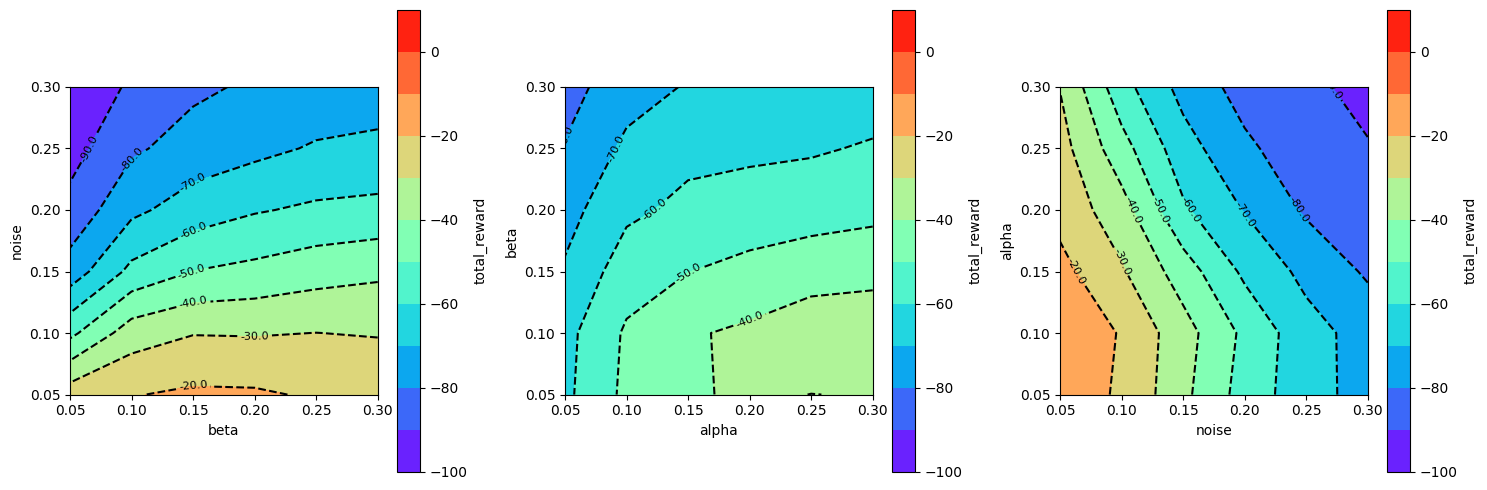

In [291]:
import matplotlib.pyplot as plt
import numpy as np
lev = [i for i in range(-100, 15, 10)]

# Noise-Beta Plot
df_subset1 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset1 = df_subset1.groupby(['noise', 'beta'])['total_reward'].mean().reset_index()

pivot_table1 = df_subset1.pivot(index='noise', columns='beta', values='total_reward')
pivot_table1 = pivot_table1.fillna(0)

X1 = pivot_table1.columns.values
Y1 = pivot_table1.index.values
Z1 = pivot_table1.values - t_t_r
X1, Y1 = np.meshgrid(X1, Y1)

# Alpha-Beta Plot
df_subset2 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset2 = df_subset2.groupby(['alpha', 'beta'])['total_reward'].mean().reset_index()

pivot_table2 = df_subset2.pivot(index='alpha', columns='beta', values='total_reward')
pivot_table2 = pivot_table2.fillna(0)

X2 = pivot_table2.columns.values
Y2 = pivot_table2.index.values
Z2 = pivot_table2.values - t_t_r
X2, Y2 = np.meshgrid(X2, Y2)

# Alpha-Noise Plot
df_subset3 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset3 = df_subset3.groupby(['alpha', 'noise'])['total_reward'].mean().reset_index()

pivot_table3 = df_subset3.pivot(index='alpha', columns='noise', values='total_reward')
pivot_table3 = pivot_table3.fillna(0)

X3 = pivot_table3.columns.values
Y3 = pivot_table3.index.values
Z3 = pivot_table3.values - t_t_r
X3, Y3 = np.meshgrid(X3, Y3)

# Create a figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Noise-Beta
c1 = axs[0].contour(X1, Y1, Z1,colors='black', levels=lev)
c1.clabel(fmt='%1.1f', fontsize=8) 
c1 = axs[0].contourf(X1, Y1, Z1,cmap='rainbow', levels=lev)  

fig.colorbar(c1, ax=axs[0], label='total_reward')
axs[0].set_ylabel('noise')
axs[0].set_xlabel('beta')
axs[0].set_aspect('equal')

# Plot Alpha-Beta
c2 = axs[1].contour(X2, Y2, Z2,colors='black', levels=lev)
c2.clabel(fmt='%1.1f', fontsize=8) 
c2 = axs[1].contourf(X2, Y2, Z2,cmap='rainbow', levels=lev)  

fig.colorbar(c2, ax=axs[1], label='total_reward')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('beta')
axs[1].set_aspect('equal')

# Plot Alpha-Noise

c3 = axs[2].contour(X3, Y3, Z3,colors='black', levels=lev)
c3.clabel(fmt='%1.1f', fontsize=8) 
c3 = axs[2].contourf(X3, Y3, Z3,cmap='rainbow', levels=lev)  

fig.colorbar(c3, ax=axs[2], label='total_reward')
axs[2].set_ylabel('alpha')
axs[2].set_xlabel('noise')
axs[2].set_aspect('equal')

# Show the figure
plt.tight_layout()
plt.show()

In [292]:
df_subset4 = df2_
max_reward = df_subset4['total_reward'].max()
max_reward_records = df_subset4[df_subset4['total_reward'] == max_reward]
max_reward_records

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
14,0.3,0.6,0.05,0.15,0.15,186,1
17,0.3,0.6,0.05,0.15,0.30,186,1


In [293]:
df = pd.read_csv('./csv/gp_ts/gp_ts.csv')
df

,f_sigma,f_max,noise,alpha,beta,seed,play_time,select_arm,reward
0,0.3,0.6,0.05,0.05,0.05,1,0,0.968262,0
1,0.3,0.6,0.05,0.05,0.05,1,1,0.233666,0
2,0.3,0.6,0.05,0.05,0.05,1,2,0.754891,0
3,0.3,0.6,0.05,0.05,0.05,1,3,0.505742,0
4,0.3,0.6,0.05,0.05,0.05,1,4,0.328361,0
...,...,...,...,...,...,...,...,...,...
388795,0.2,0.4,0.30,0.30,0.30,6,295,0.623571,0
388796,0.2,0.4,0.30,0.30,0.30,6,296,0.395896,0
388797,0.2,0.4,0.30,0.30,0.30,6,297,0.357317,0
388798,0.2,0.4,0.30,0.30,0.30,6,298,0.319398,0


In [294]:
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.05) &  (df['alpha'] == 0.15) &  (df['seed'] == 1)]
r_df = f_df[['play_time', 'select_arm', 'reward']]

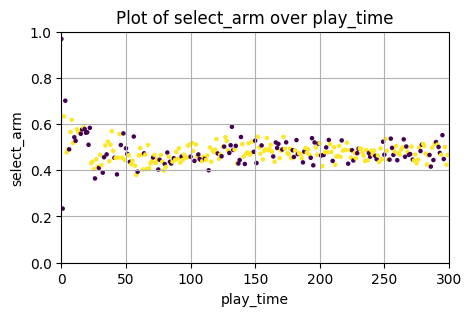

In [295]:
plt.figure(figsize=(5,3))
plt.scatter(r_df['play_time'], r_df['select_arm'], s=5, c=r_df['reward'])
plt.xlabel('play_time')
plt.ylabel('select_arm')
plt.title('Plot of select_arm over play_time')  
plt.xlim(0,len(r_df['play_time']))
plt.ylim(0,1)
plt.grid()
plt.show()

In [296]:
# 0.3	0.6	0.05	0.15	0.15	
df = pd.read_csv('./csv/gp_ts/gp_ts.csv')
f_max = 0.6
f_sigma = 0.3
df = df[(df['f_max'] == f_max) & (df['f_sigma'] == f_sigma)]
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.15) &  (df['alpha'] == 0.15)]
f_df

,f_sigma,f_max,noise,alpha,beta,seed,play_time,select_arm,reward
4200,0.3,0.6,0.05,0.15,0.15,1,0,0.968262,0
4201,0.3,0.6,0.05,0.15,0.15,1,1,0.233666,0
4202,0.3,0.6,0.05,0.15,0.15,1,2,0.632616,1
4203,0.3,0.6,0.05,0.15,0.15,1,3,0.700726,0
4204,0.3,0.6,0.05,0.15,0.15,1,4,0.489565,1
...,...,...,...,...,...,...,...,...,...
69295,0.3,0.6,0.05,0.15,0.15,2,295,0.498663,1
69296,0.3,0.6,0.05,0.15,0.15,2,296,0.516267,1
69297,0.3,0.6,0.05,0.15,0.15,2,297,0.488096,1
69298,0.3,0.6,0.05,0.15,0.15,2,298,0.503129,1


In [297]:
f_df = f_df.groupby('play_time').mean()
f_df

,f_sigma,f_max,noise,alpha,beta,seed,select_arm,reward
play_time,,,,,,,,
0,0.3,0.6,0.05,0.15,0.15,1.5,0.852504,0.0
1,0.3,0.6,0.05,0.15,0.15,1.5,0.205988,0.0
2,0.3,0.6,0.05,0.15,0.15,1.5,0.815560,0.5
3,0.3,0.6,0.05,0.15,0.15,1.5,0.570585,0.0
4,0.3,0.6,0.05,0.15,0.15,1.5,0.529488,1.0
...,...,...,...,...,...,...,...,...
295,0.3,0.6,0.05,0.15,0.15,1.5,0.525180,0.5
296,0.3,0.6,0.05,0.15,0.15,1.5,0.482257,0.5
297,0.3,0.6,0.05,0.15,0.15,1.5,0.494175,1.0


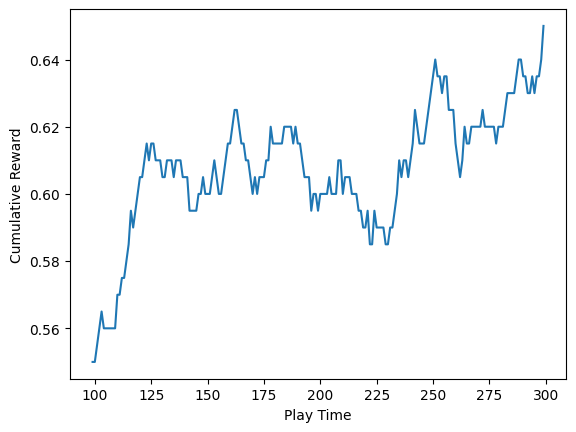

In [298]:
# 合計報酬の計算
f_df = f_df.groupby('play_time').mean()
cumulative_reward = f_df['reward'].rolling(window=100).mean()
le = [i for i in range(300)]
# プロットの作成
plt.plot(le, cumulative_reward)
plt.xlabel('Play Time')
plt.ylabel('Cumulative Reward')
plt.show()